#  Linear regression with regularization & Bias-Variance tradeoff



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy.optimize import minimize
import scipy.io
from matplotlib import pyplot
from LinearRegression_Regularization import *

#### Loading Andrew Ng Machine learning coursera data set

In [2]:
data = scipy.io.loadmat('dataset/ex5data1.mat')

In [3]:
X, y = data['X'], data['y']
Xtest, ytest = data['Xtest'], data['ytest']
Xval, yval = data['Xval'], data['yval']
m = y.size

### Visualizing data set

Text(0, 0.5, 'Water flowing out of the dam (y)')

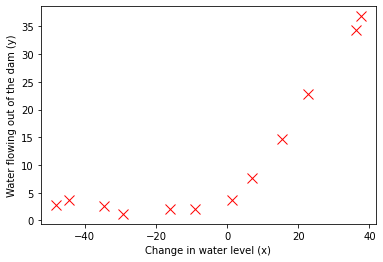

In [4]:
plt.plot(X, y, 'rx',ms=10 )
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

#### Regularized linear regression cost function

![alt text](Figures/LREquations.png)

#### Regularized linear regression gradient
![alt text](Figures/GradientDescent.png)

In [5]:
LR = LinearRegression()

#### Applying Gradient descent for linear regression

In [6]:
theta = np.array([1,1])
J,Grad = LR.gradientDescent(np.append(np.ones((m, 1)), X, axis=1), y,theta, 1)
J,Grad

(303.9931922202643, array([[-15.30301567, 598.25074417]]))

#### Optimal value of theta using scipy optimizer

In [7]:
# initializing lambda to 0
lambda_ = 0
X_aug = np.append(np.ones((m, 1)), X, axis=1)
theta = np.zeros((X_aug.shape[1],1))
theta = LR.minimumcost(LR.gradientDescent,X_aug,y,theta,lambda_)

In [8]:
theta

array([13.08790351,  0.36777923])

## High Bias

High Bias occurs when the model is too simple and is unable to fit our dataset. There exist high training and cross validation error resulting in Underfitting.

#### Ploting the graph using optimal theta

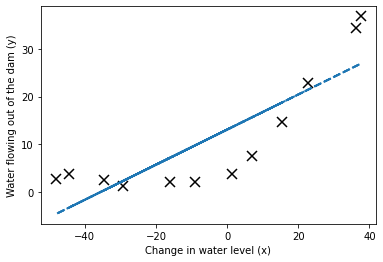

In [9]:
plt.plot(X, y, 'rx', ms=10, mec='k', mew=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(X_aug, theta), '--', lw=2);

##### Looking at the plot, we can say that there is high bias in the data (underfitting)

#### Writing a function for generating learning curve

In [10]:
def learning_curve(X,y,Xval, yval,theta,lambda_):
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
    theta = np.zeros((X.shape[1],1))
    for i in range(1,m+1):
        theta_t = LR.minimumcost(LR.gradientDescent,X[:i], y[:i],theta,lambda_)
        error_train[i-1],_ = LR.gradientDescent(X[:i], y[:i] ,theta_t, lambda_)
        error_val[i-1],_ = LR.gradientDescent(Xval, yval ,theta_t,lambda_)
    return error_train,error_val

In [11]:
X_aug = np.append(np.ones((m, 1)), X, axis=1)
Xval_aug = np.append(np.ones((yval.size, 1)), Xval, axis=1)
error_train,error_val = learning_curve(X_aug,y,Xval_aug, yval,theta,0)

In [12]:
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


#### Looking at the distribution, we can say that the model is too simple and is unable to fit our data set. We see high error in traning and cross validation dataset

##### Ploting the learning curve

(0.0, 13.0, 0.0, 150.0)

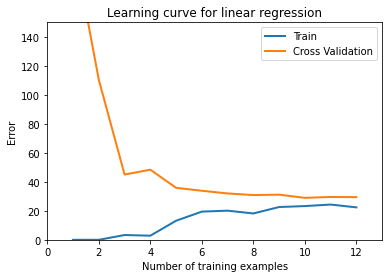

In [13]:
plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

#### Looking at the plot, we can say that the model is too simple and is unable to fit our data set resulting High Bias (Underfitting).

### Applying Polynomial regression to address Underfitting

In [14]:
def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)
    return X_poly

In [15]:
x_new = polyFeatures(X, 8)

### Normalizing Polynomial function

In [16]:
p = 8
X_poly = polyFeatures(X, p)
X_poly,mu,sigma =  LR.featureNormalization(X_poly)
X_poly = np.append(np.ones((m, 1)), X_poly, axis=1)


Xtest_poly = polyFeatures(Xtest, p)
Xtest_poly -= mu
Xtest_poly /= sigma
Xtest_poly = np.append(np.ones((ytest.size, 1)), Xtest_poly, axis=1)


Xval_poly = polyFeatures(Xval, p)
Xval_poly -= mu
Xval_poly /= sigma
Xval_poly = np.append(np.ones((yval.size, 1)), Xval_poly, axis=1)


In [17]:
lambda_ = 100
theta = np.zeros((X_poly.shape[1],1))

In [18]:
def plotFit(polyFeatures, min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)

    # Map the X values
    X_poly = polyFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma

    # Add ones
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)

    # Plot
    plt.plot(x, np.dot(X_poly, theta), '--', lw=2)

In [19]:
def plotgraph(lambda_):
    theta = np.zeros((X_poly.shape[1],1))
    theta_t = LR.minimumcost(LR.gradientDescent,X_poly, y,theta,lambda_, maxiter=55)
    plt.plot(X, y, 'rx', ms=10, mew=1.5, mec='k')
    plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta_t, p)
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
    plt.ylim([-20, 50])

In [20]:
def plotlearningCurve(lambda_):
    error_train, error_val = learning_curve(X_poly, y, Xval_poly, yval,theta, lambda_)
    plt.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)
    plt.legend(['Train', 'Cross Validation'])
    pyplot.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
    pyplot.xlabel('Number of training examples')
    pyplot.ylabel('Error')
    pyplot.legend(['Train', 'Cross Validation'])

    print('Polynomial Regression (lambda = %f)\n' % lambda_)
    print('# Training Examples\tTrain Error\tCross Validation Error')
    for i in range(m):
        print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

### Using Lambda = 100 resulted in High Bias (Underfitting)

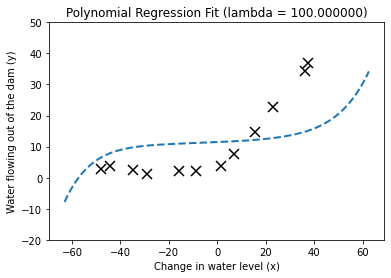

In [29]:
plotgraph(lambda_= 100)

Polynomial Regression (lambda = 100.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.114717	144.124099
  	3		112.255156	70.935873
  	4		131.638608	79.137897
  	5		116.062526	66.126942
  	6		108.778507	61.957759
  	7		93.297101	62.018723
  	8		86.349367	61.581277
  	9		80.206754	62.481408
  	10		73.060272	62.979548
  	11		66.883255	63.626911
  	12		65.950955	61.559272


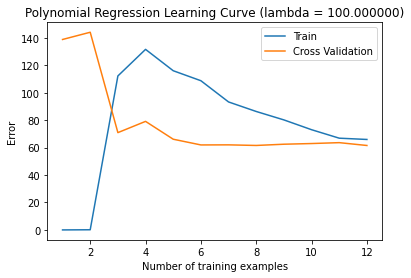

In [22]:
plotlearningCurve(lambda_= 100)

In the plot, we can see as the number of training example increases the traning and cross validation error remains constant resulting in high bias (Underfitting issue)

### Using Lambda = 0 resulted in High variance (Overfitting)

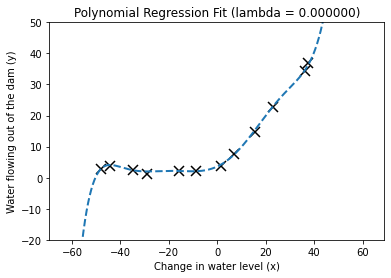

In [30]:
plotgraph(lambda_= 0)

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	161.442168
  	2		0.000000	160.792291
  	3		0.000000	68.190972
  	4		0.000000	84.857285
  	5		0.000000	6.478478
  	6		0.000000	10.781098
  	7		0.000000	27.983913
  	8		0.000000	19.842111
  	9		0.000943	28.748430
  	10		0.032030	27.465694
  	11		0.035037	33.990412
  	12		0.030037	39.878552


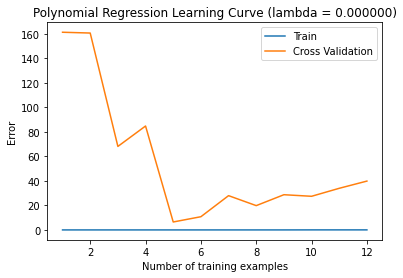

In [24]:
plotlearningCurve(lambda_= 0)

In the plot, we can see as the number of training example increases the traning error is very low. However, the cross validation error is significantly high resulting in high variance (Overfitting issue)

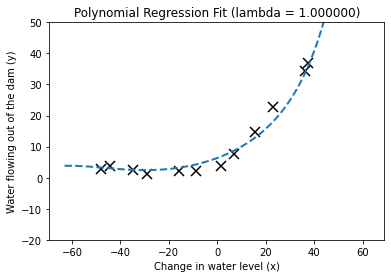

In [31]:
plotgraph(lambda_= 1)

Polynomial Regression (lambda = 1.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846776
  	2		0.070327	143.505063
  	3		17.182727	7.845035
  	4		13.476899	9.212260
  	5		10.781524	9.222846
  	6		9.347014	11.024708
  	7		8.754387	8.290399
  	8		7.682189	8.001083
  	9		7.277291	8.793851
  	10		6.592031	8.528239
  	11		5.994056	8.585899
  	12		6.830463	7.047218


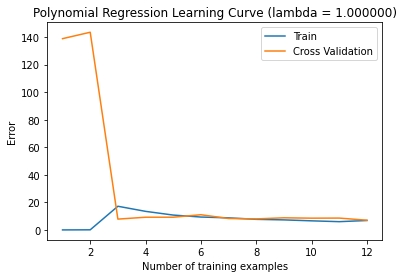

In [26]:
plotlearningCurve(lambda_= 1)

In the plot, we can see as the number of training example increases the traning error and the cross validation error decreases consistently resulting in a good model.